# Parameter Estimation: simlutation example

## 1. AR model: linear regression


### 1.1 AR(2) stationary

In [1]:
# AR(2) process simulation: stationary
w2=rnorm(1500)
b=c(1.2,-0.5)
ar2=filter(w2,filter=b,method='recursive')
ar2=ar2[1001:1500]

In [2]:
#Fit linear regression to AR(2)
data2=data.frame(cbind(x1=ar2[1:498],x2=ar2[2:499],y=ar2[3:500]))
model2=lm(y~x1+x2,data=data2)
summary(model2)


Call:
lm(formula = y ~ x1 + x2, data = data2)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.12759 -0.73578  0.03242  0.64283  2.80423 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.06951    0.04580   1.518     0.13    
x1          -0.50912    0.03873 -13.147   <2e-16 ***
x2           1.19173    0.03873  30.770   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.014 on 495 degrees of freedom
Multiple R-squared:  0.7207,	Adjusted R-squared:  0.7196 
F-statistic: 638.8 on 2 and 495 DF,  p-value: < 2.2e-16


**Comment:**

x1 refer to $x_{t-2}$, x2 refer to $x_{t-1}$. The model of the mosel are slightly similar with some variations from the simulating model
$X_t=1.2X_{t-1}-0.5X_{t-2}$

p-value are very small indicating that the regression coefficients corresponding to those predictors are statistically significant.

We can furthur use the **T-test** to evaluate whether the coefficients are plausibly equal to the true parameters.

$H_0: \beta_1=-0.5$ vs $H_1: \beta_1\ne -0.5$


In [3]:
coef(summary(model2))[2,2]

[1] 0.03872601

In [4]:
t.value=(model2$coefficients[[2]]-(-0.5))/coef(summary(model2))[2,2]
p.value=2*(1-pnorm(t.value))
p.value

[1] 1.186121

P-value is large indicate that we do not reject $H_0$

**Plot the AR model and the residual**

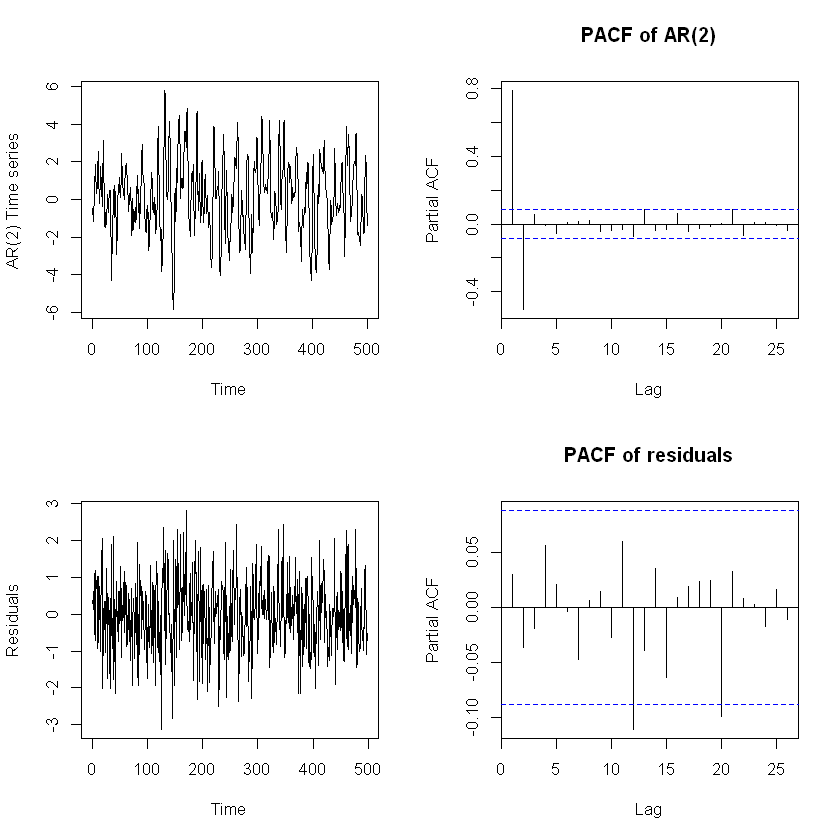

In [5]:
par(mfrow=c(2,2))
ts.plot(ar2,ylab='AR(2) Time series')
pacf(ar2, main='PACF of AR(2)')

ts.plot(model2$residuals,ylab='Residuals')
pacf(model2$residuals, main='PACF of residuals')

The PACF plot for the residuals has all of the bars within the confidence band. Indicating that the PACF is plausibly close to 0 for
all lags, an indication of an AR(0) or a white noise process. Thus, a linear regression provides a good fit for the AR model.

### 1.2 AR(1) model fitted with AR(2) linear regresson

In [6]:
w2=rnorm(1500)
b=0.5
ar1=filter(w2,filter=b, method='recursive')
ar1=ar1[1001:1500]

In [7]:
data3=data.frame(cbind(x1=ar1[1:498],x2=ar1[2:499],y=ar1[3:500]))
model3=lm(y~x1+x2,data=data3)
summary(model3)


Call:
lm(formula = y ~ x1 + x2, data = data3)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.06246 -0.71134 -0.00945  0.66184  2.49403 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.005349   0.044901   0.119    0.905    
x1          -0.021545   0.044957  -0.479    0.632    
x2           0.425160   0.044971   9.454   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.002 on 495 degrees of freedom
Multiple R-squared:  0.1734,	Adjusted R-squared:   0.17 
F-statistic: 51.91 on 2 and 495 DF,  p-value: < 2.2e-16


**Comment:**

The coefficient of $X_2$ is close to 0.5 the true parameter. Onthe other hand, the coefficent for $X_1$ is 0.04 and the p-value is large indicating that this coefficient is plausibly 0. Thus the mode fit suggest an AR(1) model.

# 2. method of moments
which is the **Yule-Walker** estimation approach for AR model. Here we try to fit the AR(3) to an AR(2) model.

In [21]:
w2=rnorm(1500)
b=c(1.2,-0.5)
ar2=filter(w2,filter=b,method='recursive')
ar2=ar2[1001:1500]

## Fit AR(3) to an AR(2) model
# From gamma(1) and gamma_3 Matrix
covf=acf(ar2,type='covariance',plot=FALSE)
Gamma1=covf$acf[2:4,,1]
Gammamatrix=matrix(0,3,3)
for (i in 1:3){
    if(i>1){
        Gammamatrix[i,]=c(covf$acf[i:2,,1],covf$acf[1:(3-i+1),,1])
    }
    else{
        Gammamatrix[i,]=covf$acf[1:(3-1+1),,1]
    }
}
## Estimate phi
phi.estim=solve(Gammamatrix,Gamma1)

In [25]:
Gammamatrix
Gamma1
phi.estim

4.214210,3.383685,1.913050
3.383685,4.214210,3.383685
1.913050,3.383685,4.214210


[1] 3.3836850 1.9130501 0.5309543

[1]  1.22725336 -0.52144967 -0.01243921

`phi.estim` result is not far from the estimated model $AR(2): X_t=1.2X_{t-1}-0.5X_{t-2}+Z_t$